In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

Get latitude and longitude of some provinces in Thailand then convert from Degrees Minutes Seconds to Decimal Degrees
- https://www.mapsofworld.com/lat_long/thailand-lat-long.html
- https://www.latlong.net/degrees-minutes-seconds-to-decimal-degrees

In [4]:
# create new dataframe

df = pd.DataFrame({
                    'Province': ['Amnart Chaoen', 'Ang Thong', 'Phatthalung', 'Phayao', 'Phet Buri', 'Chanthaburi', 'Buriram', 'Chainat', 'Phitsanulok', 'Nakhon Nayok', 'Chon Buri', 'Surin'], 
                    'Latitude_Degree': ["15°51'N", "14°35'N", "07°39'N", "19°11'N", "13°01'N", "12°38'N", "15°00'N", "15°11'N", "14°20'N", "14°12'N", "13°21'N", "14°50'N"], 
                    'Longitude_Degree': ["104°38'E", "100°31'E", "100°06'E", "99°55'E", "99°55'E", "102°12'E", "103°00'E", "100°08'E", "104°0'E", "101°13'E", "101°01'E", "103°34'E"],
                    'Latitude_Decimal': [15.85, 14.58, 7.65, 19.18, 13.01, 12.63, 15.00, 15.18, 14.33, 14.20, 13.35, 14.83],
                    'Longitude_Decimal': [104.63, 100.51, 100.10, 99.91, 99.92, 102.20, 103.00, 100.13, 104.00, 101.22, 101.02, 103.57]
                    })
df

,Province,Latitude_Degree,Longitude_Degree,Latitude_Decimal,Longitude_Decimal
0,Amnart Chaoen,15°51'N,104°38'E,15.85,104.63
1,Ang Thong,14°35'N,100°31'E,14.58,100.51
2,Phatthalung,07°39'N,100°06'E,7.65,100.10
3,Phayao,19°11'N,99°55'E,19.18,99.91
4,Phet Buri,13°01'N,99°55'E,13.01,99.92
5,Chanthaburi,12°38'N,102°12'E,12.63,102.20
6,Buriram,15°00'N,103°00'E,15.00,103.00
7,Chainat,15°11'N,100°08'E,15.18,100.13
8,Phitsanulok,14°20'N,104°0'E,14.33,104.00
9,Nakhon Nayok,14°12'N,101°13'E,14.20,101.22


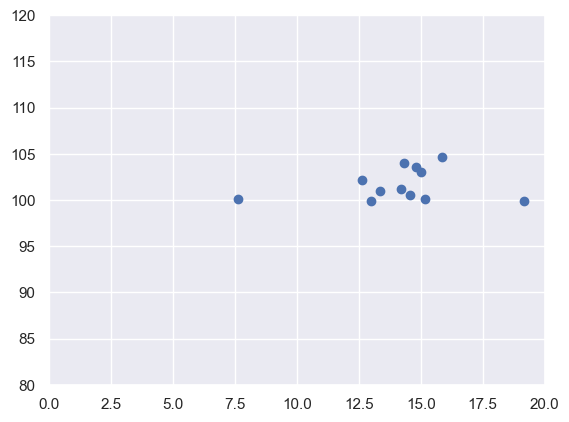

In [14]:
# plot the data

plt.scatter(df['Latitude_Decimal'], df['Longitude_Decimal'])
plt.xlim(0,20)
plt.ylim(80,120)
plt.show()

In [16]:
# select the features

features = df.iloc[:, -2:]
features

,Latitude_Decimal,Longitude_Decimal
0,15.85,104.63
1,14.58,100.51
2,7.65,100.10
3,19.18,99.91
4,13.01,99.92
5,12.63,102.20
6,15.00,103.00
7,15.18,100.13
8,14.33,104.00
9,14.20,101.22


In [17]:
# clustering

km = KMeans(2) # 2 clusters
km

KMeans(n_clusters=2)

In [25]:
km.fit(features) # train a KMean model of 2 clusters

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [26]:
clusters = km.fit_predict(features)
clusters

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
df_with_cluster = df.copy()
df_with_cluster

,Province,Latitude_Degree,Longitude_Degree,Latitude_Decimal,Longitude_Decimal
0,Amnart Chaoen,15°51'N,104°38'E,15.85,104.63
1,Ang Thong,14°35'N,100°31'E,14.58,100.51
2,Phatthalung,07°39'N,100°06'E,7.65,100.10
3,Phayao,19°11'N,99°55'E,19.18,99.91
4,Phet Buri,13°01'N,99°55'E,13.01,99.92
5,Chanthaburi,12°38'N,102°12'E,12.63,102.20
6,Buriram,15°00'N,103°00'E,15.00,103.00
7,Chainat,15°11'N,100°08'E,15.18,100.13
8,Phitsanulok,14°20'N,104°0'E,14.33,104.00
9,Nakhon Nayok,14°12'N,101°13'E,14.20,101.22


In [28]:
df_with_cluster['Cluster'] = clusters
df_with_cluster

,Province,Latitude_Degree,Longitude_Degree,Latitude_Decimal,Longitude_Decimal,Cluster
0,Amnart Chaoen,15°51'N,104°38'E,15.85,104.63,0
1,Ang Thong,14°35'N,100°31'E,14.58,100.51,0
2,Phatthalung,07°39'N,100°06'E,7.65,100.10,1
3,Phayao,19°11'N,99°55'E,19.18,99.91,0
4,Phet Buri,13°01'N,99°55'E,13.01,99.92,0
5,Chanthaburi,12°38'N,102°12'E,12.63,102.20,0
6,Buriram,15°00'N,103°00'E,15.00,103.00,0
7,Chainat,15°11'N,100°08'E,15.18,100.13,0
8,Phitsanulok,14°20'N,104°0'E,14.33,104.00,0
9,Nakhon Nayok,14°12'N,101°13'E,14.20,101.22,0


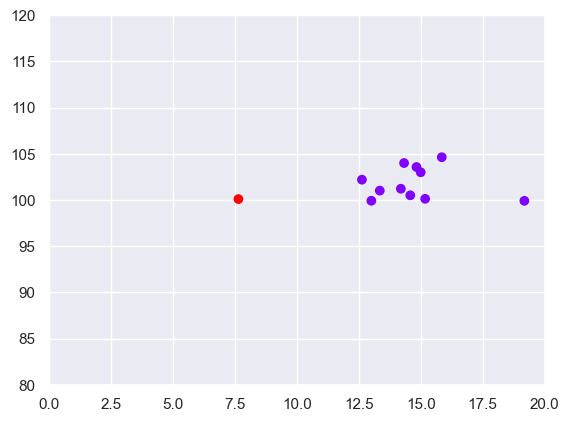

In [30]:
# plot the data

plt.scatter(df_with_cluster['Latitude_Decimal'], df_with_cluster['Longitude_Decimal'], c = df_with_cluster['Cluster'], cmap = 'rainbow')
plt.xlim(0,20)
plt.ylim(80,120)
plt.show()